In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Sep 22 16:31:39 2017

@author: dhaval
"""
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing data
df = pd.read_excel('Master Sales Data July 2017.xlsx')

# Delete Unnecessary Columns in Data
cleaned_data = df.drop(['Sr. No.'], axis = 1)
cleaned_data.drop(['Yardi - Lease Details'], axis = 1, inplace = True)
cleaned_data.drop(['Lease Code'], axis = 1, inplace = True)

# List of columns of Old TD and rent
cleaned_data_columns = list(cleaned_data.columns)
s_columns = cleaned_data_columns[12:64]
r_columns = cleaned_data_columns[276:328]
td_columns = cleaned_data_columns[65:117]

# Replacing 0 With NaN to avoid 'Divide By Zero Error'    
cleaned_data[s_columns[:]] = cleaned_data[s_columns[:]].replace({0:np.nan})
cleaned_data[r_columns[:]] = cleaned_data[r_columns[:]].replace({0:np.nan})
cleaned_data[td_columns[:]] = cleaned_data[td_columns[:]].replace({0:np.nan})

# TD Calculation
for x in range(0,52):
    cleaned_data[td_columns[x]] = cleaned_data[td_columns[x]] / cleaned_data[r_columns[x]]

# New Data Frame for TD analysis
columns = list(cleaned_data.columns)
column_td = ['Brand Name', 'Floor', 'Format', 'Category - New format', 'Carpet Area']

# Added all columns of Sales to column list
for x in range(0,52):
    column_td.append(s_columns[x])
# Added all columns of Rent to column list
for x in range(0,52):
    column_td.append(r_columns[x])
# Added all columns of TD to column list
for x in range(0,52):
    column_td.append(td_columns[x])

df_td = pd.DataFrame(data = cleaned_data, columns = column_td)
df_td = df_td.iloc[0:327,:] # Selected 327 rows as the remaining were blank

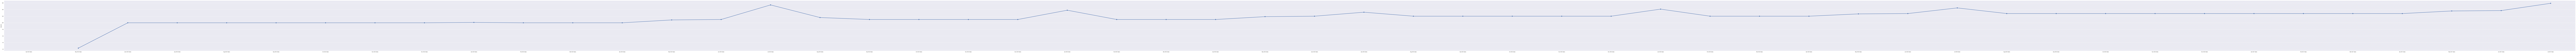

In [34]:
plt.figure(figsize=(500,10))
sns.pointplot(x = s_columns, y = df_td.iloc[1,57:109])

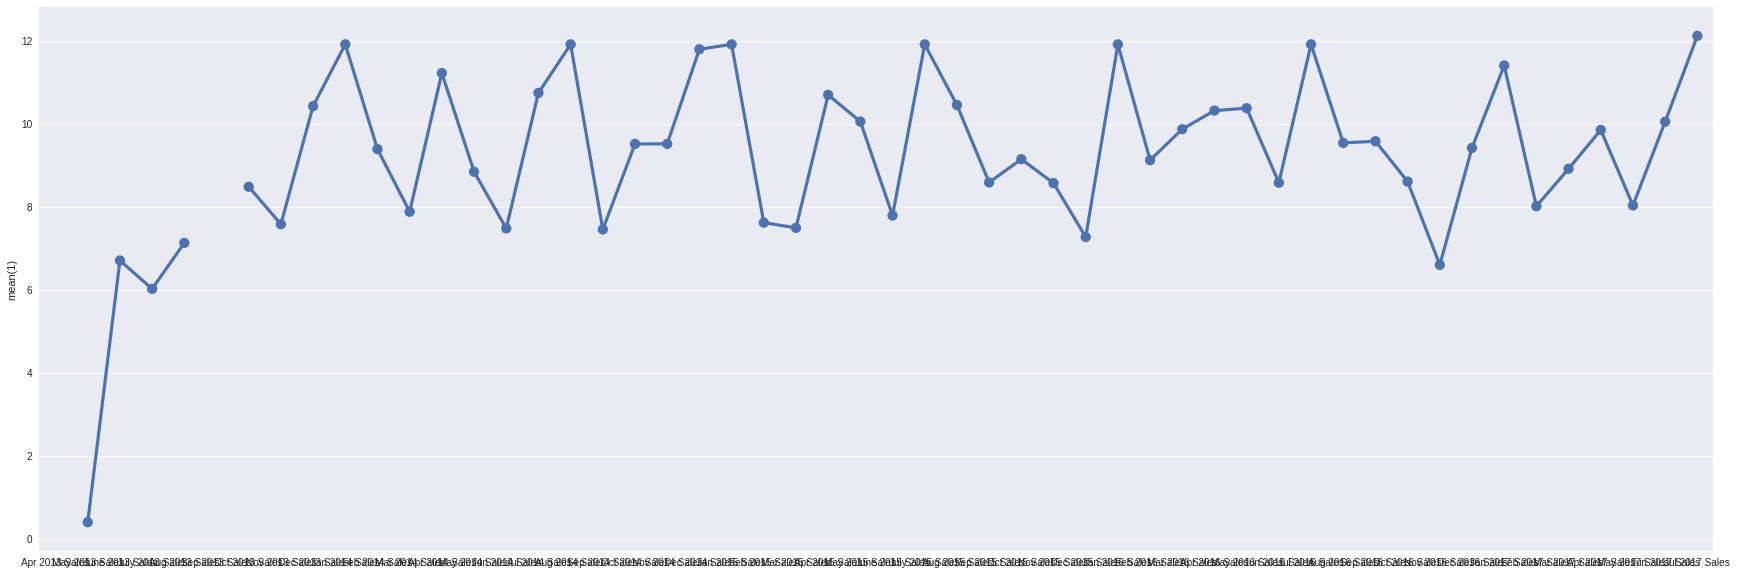

In [35]:
plt.figure(figsize=(30,10))
sns.pointplot(x = s_columns, y = df_td.iloc[1,109:161])

In [46]:
plt.figure(figsize=(100,20))
sns.lmplot(x = td_columns[:], y = df_td.iloc[:,109:161],data = df_td, hue = df_td['Floor'])

SystemError: <built-in function getattr> returned a result with an error set

In [56]:
plt.figure(figsize = (100,20))
sns.lmplot(x = td_columns[0:2], y = "TD", data = df_td.iloc[:, 109:111])

TypeError: '>' not supported between instances of 'str' and 'list'

In [57]:
df_td.iloc[:, 109:111]

,Apr 2013 TD,May 2013 TD
0,5.389500,6.086333
1,NaN,0.414650
2,7.225987,8.015892
3,4.658922,5.308873
4,NaN,NaN
5,4.137190,4.528840
6,7.458570,6.625797
7,0.777444,15.630700
8,6.211820,6.174148
9,10.745024,11.000538


In [69]:
len(td_columns)

52

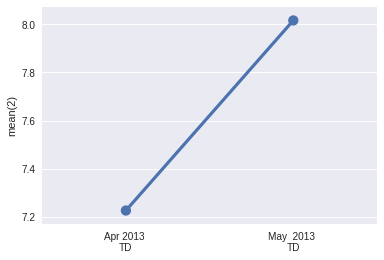

In [70]:
sns.pointplot(x = td_columns[:2], y = df_td.iloc[2,109:111])

ValueError: x and y must be the same size

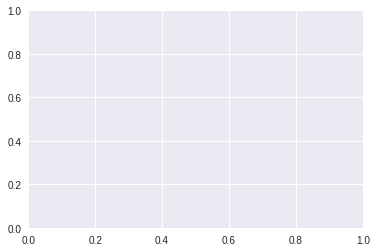

In [75]:
plt.scatter(x = td_columns[0],y = df_td.iloc[:,109])

In [76]:
from pandas import ExcelWriter

writer = ExcelWriter('TD.xlsx')
df_td.to_excel(writer)
writer.save()

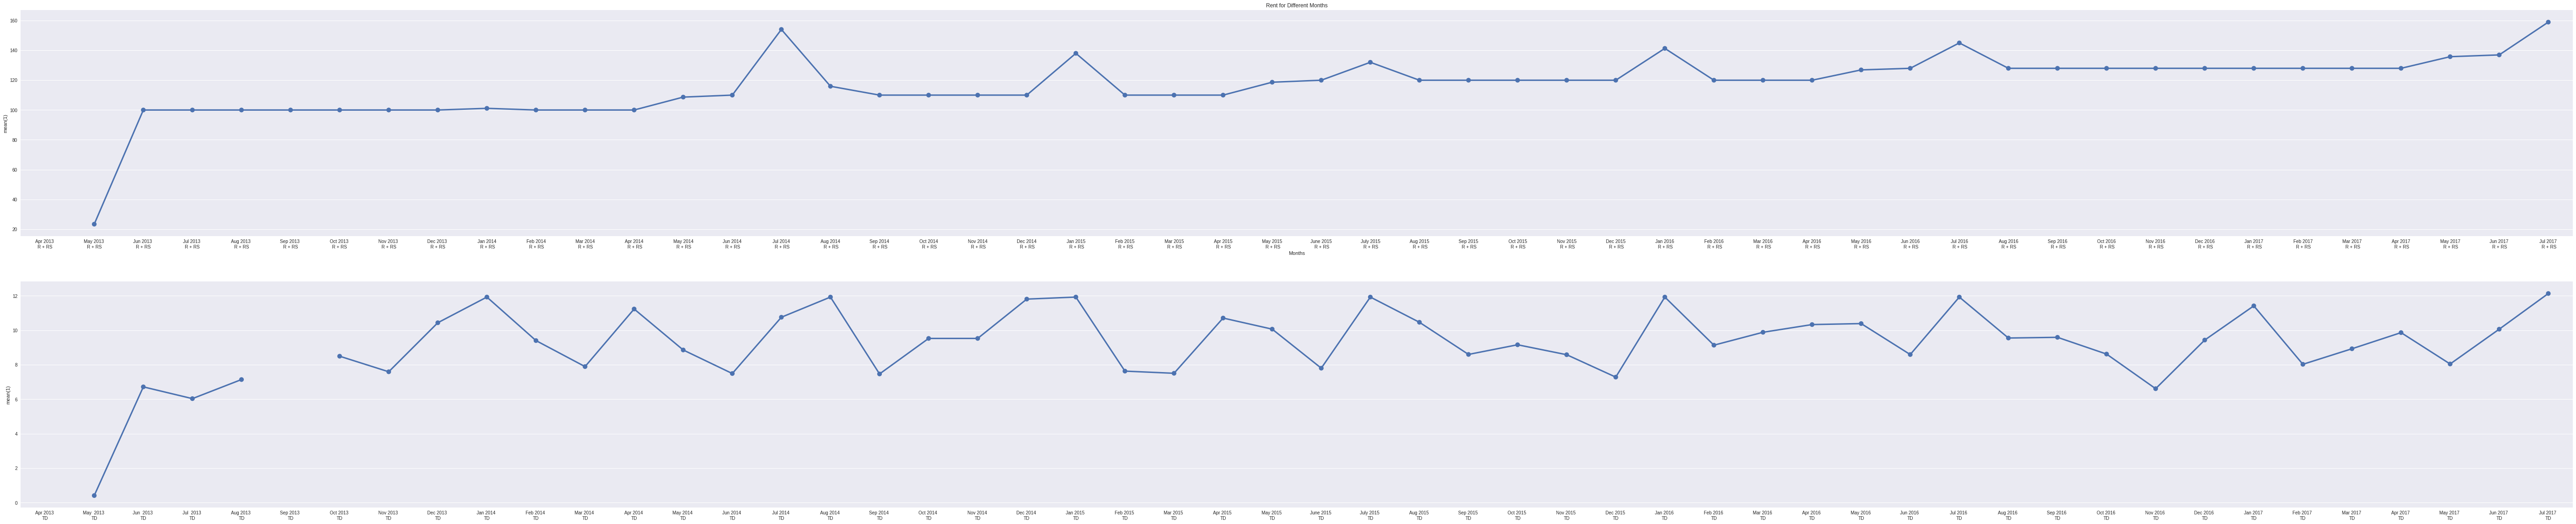

In [95]:
# Create a figure instance, and the two subplots
fig = plt.figure(figsize=(100,20))

ax1 = fig.add_subplot(211)
ax1.set_title("Rent for Different Months")
ax1.set_xlabel("Months")
ax1.set_ylabel("Rent")

ax2 = fig.add_subplot(212)
ax2.set_title("Trading Density for Different Months")
ax2.set_xlabel("Months")
ax2.set_ylabel("Trading Density")

sns.pointplot(x = r_columns, y = df_td.iloc[1, 57:109], ax= ax1)
sns.pointplot(x = td_columns, y = df_td.iloc[1, 109:161], ax = ax2)

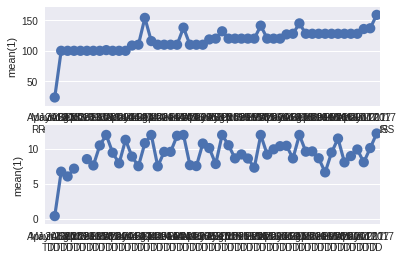

In [92]:

f, (ax1, ax2) = plt.subplots(2)
plt.figure(figsize = (100,20))
sns.pointplot(x = r_columns, y = df_td.iloc[1, 57:109], ax= ax1)
plt.figure(figsize = (100,20))
sns.pointplot(x = td_columns, y = df_td.iloc[1, 109:161], ax = ax2) 